In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [6]:
df = pd.read_csv("basededados.xls", delimiter=";")
df

,WWR,Tvis,N_aletas,angulo,largura,direcao,UDI',UDI,UDI_more,UDI_less
0,0.1,0.100,1,0.0,0.1,0.0,1.65,16.5,9.86,0.25
1,0.1,0.295,1,0.0,0.1,0.0,3.99,39.9,9.11,1.06
2,0.1,0.490,1,0.0,0.1,0.0,5.24,52.4,8.39,1.47
3,0.1,0.685,1,0.0,0.1,0.0,6.31,63.1,7.48,2.05
4,0.1,0.880,1,0.0,0.1,0.0,6.98,69.8,6.67,2.60
...,...,...,...,...,...,...,...,...,...,...
25000,0.7,0.295,10,89.0,1.2,157.5,0.08,0.8,10.00,0.00
25001,0.7,0.490,10,89.0,1.2,157.5,0.09,0.9,10.00,0.00
25002,0.7,0.685,10,89.0,1.2,157.5,0.26,2.6,10.00,0.00
25003,0.7,0.880,10,89.0,1.2,157.5,0.44,4.4,9.99,0.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25005 entries, 0 to 25004
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WWR       25005 non-null  float64
 1   Tvis      25005 non-null  float64
 2   N_aletas  25005 non-null  int64  
 3   angulo    25005 non-null  float64
 4   largura   25005 non-null  float64
 5   direcao   25005 non-null  float64
 6   UDI'      25005 non-null  float64
 7   UDI       25005 non-null  float64
 8   UDI_more  25004 non-null  float64
 9   UDI_less  25004 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.9 MB


In [11]:
df.describe()

,WWR,Tvis,N_aletas,angulo,largura,direcao,UDI',UDI,UDI_more,UDI_less
count,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25005.000000,25004.000000,25004.000000
mean,0.400000,0.489922,5.599080,44.491102,0.649890,78.734253,5.251678,52.516781,7.096902,2.077552
std,0.212136,0.275805,3.262289,31.470026,0.388955,51.561877,2.745950,27.459499,2.514646,1.968478
min,0.100000,0.100000,1.000000,0.000000,0.100000,0.000000,0.000000,0.000000,3.080000,0.000000
25%,0.250000,0.295000,3.000000,22.250000,0.375000,22.500000,3.040000,30.400000,4.410000,0.360000
50%,0.400000,0.490000,6.000000,44.500000,0.650000,67.500000,5.880000,58.800000,7.910000,1.450000
75%,0.550000,0.685000,8.000000,66.750000,0.925000,112.500000,7.790000,77.900000,9.510000,3.332500
max,0.700000,0.880000,10.000000,89.000000,1.200000,157.500000,9.220000,92.200000,10.000000,7.340000


In [29]:
df.isnull().sum()
# df = df.dropna()

WWR         0
Tvis        0
N_aletas    0
angulo      0
largura     0
direcao     0
UDI'        0
UDI         0
UDI_more    0
UDI_less    0
dtype: int64

In [18]:
# Estatísticas básicas para cada coluna numérica
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"\nEstatísticas para {column}:")
    print(df[column].agg(['min', 'max', 'mean', 'median', 'std', 'skew']).round(2))


Estatísticas para WWR:
min       0.10
max       0.70
mean      0.40
median    0.40
std       0.21
skew     -0.00
Name: WWR, dtype: float64

Estatísticas para Tvis:
min       0.10
max       0.88
mean      0.49
median    0.49
std       0.28
skew      0.00
Name: Tvis, dtype: float64

Estatísticas para N_aletas:
min        1.00
max       10.00
mean       5.60
median     6.00
std        3.26
skew      -0.09
Name: N_aletas, dtype: float64

Estatísticas para angulo:
min        0.00
max       89.00
mean      44.49
median    44.50
std       31.47
skew       0.00
Name: angulo, dtype: float64

Estatísticas para largura:
min       0.10
max       1.20
mean      0.65
median    0.65
std       0.39
skew      0.00
Name: largura, dtype: float64

Estatísticas para direcao:
min         0.00
max       157.50
mean       78.73
median     67.50
std        51.56
skew        0.00
Name: direcao, dtype: float64

Estatísticas para UDI':
min       0.00
max       9.22
mean      5.25
median    5.88
std       2.75
sk

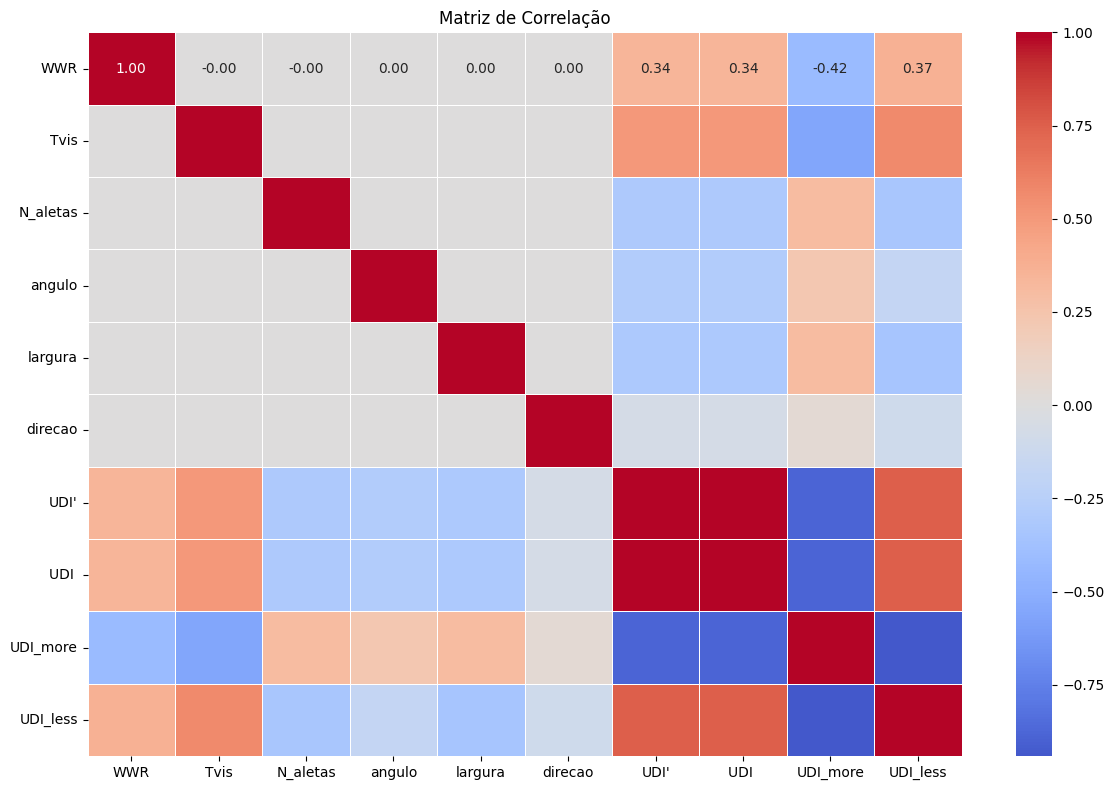

In [20]:
# 1. Matriz de Correlação com Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), 
            annot=True,  # Mostra os valores
            cmap='coolwarm',  # Esquema de cores
            center=0,  # Centro da escala de cores
            fmt='.2f',  # Formato dos números (2 casas decimais)
            linewidths=0.5)  # Largura das linhas de grade
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

In [38]:
# Versão mais personalizada
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    zmin=-1,
    zmax=1,
    text=corr_matrix.round(2),
    texttemplate='%{text}',
    textfont={"size": 10},
    hoverongaps=False,
    colorscale='RdBu_r',
    colorbar=dict(
        title='Correlação',
        titleside='right',
        thickness=20,
        len=0.9,
    )
))

fig.update_layout(
    title={
        'text': 'Matriz de Correlação',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=800,
    height=800,
    xaxis={
        'side': 'bottom',
        'tickangle': 45
    },
    yaxis={
        'autorange': 'reversed'  # Inverte o eixo y para corresponder ao formato tradicional
    },
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# Para salvar como HTML interativo
# fig.write_html("matriz_correlacao.html")

fig.show()

In [27]:
# Selecionar apenas correlações mais fortes entre variáveis
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix), k=1).astype(bool))
strong_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                for i, j in zip(*np.where(upper > 0.5))]  # ajuste o threshold (0.5) conforme necessário

print("Pares com forte correlação:")
for var1, var2, corr in strong_pairs:
    print(f"{var1} - {var2}: {corr:.2f}")

Pares com forte correlação:
Tvis - UDI': 0.50
Tvis - UDI : 0.50
Tvis - UDI_more: 0.56
Tvis - UDI_less: 0.57
UDI' - UDI : 1.00
UDI' - UDI_more: 0.88
UDI' - UDI_less: 0.76
UDI  - UDI_more: 0.88
UDI  - UDI_less: 0.76
UDI_more - UDI_less: 0.94


<Figure size 1500x1000 with 0 Axes>

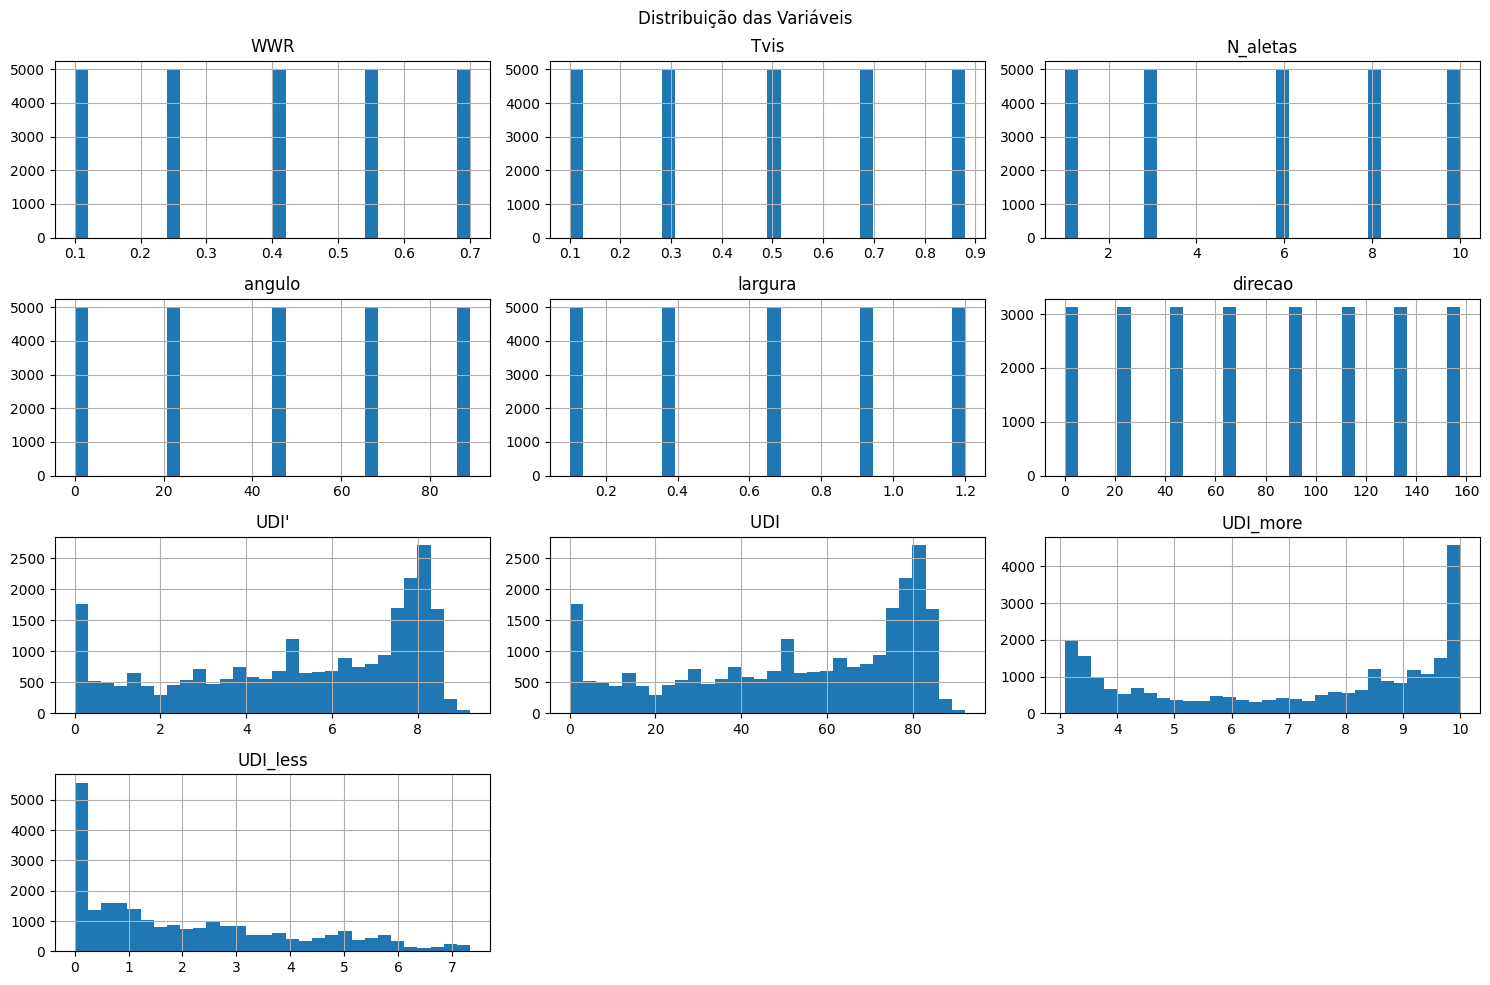

In [21]:
# 2. Distribuição das variáveis
plt.figure(figsize=(15, 10))
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis')
plt.tight_layout()
plt.show()

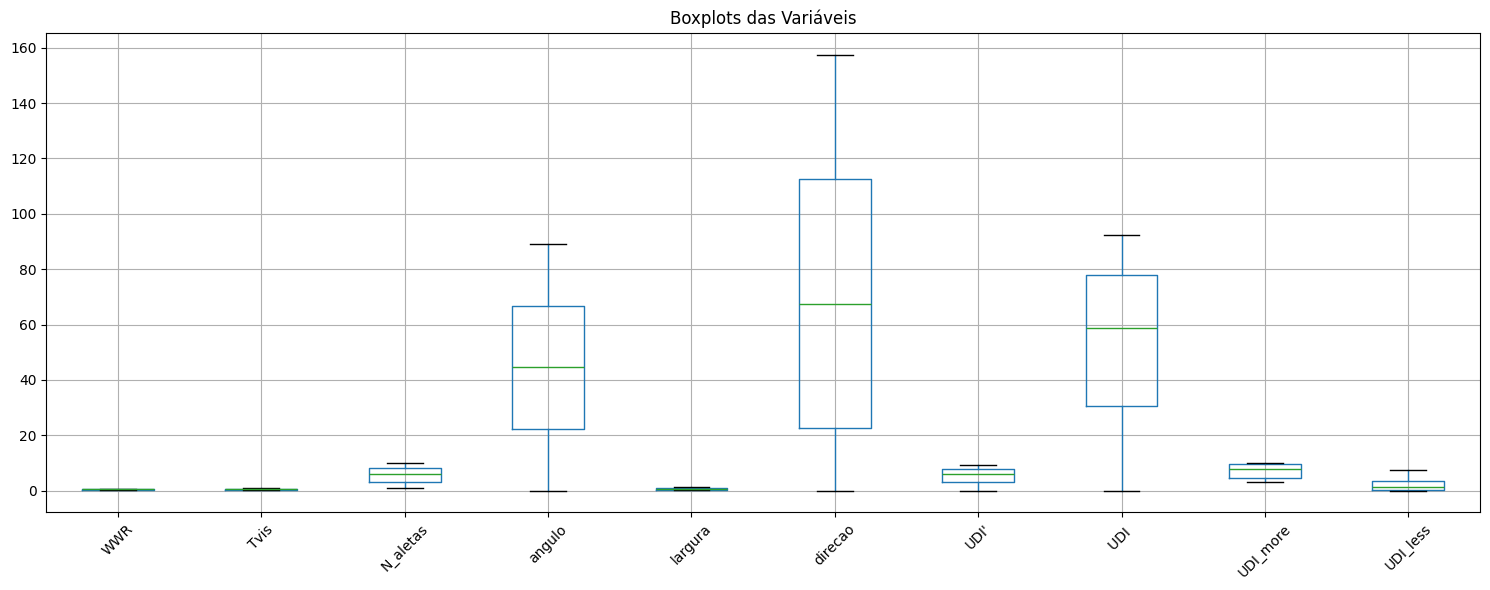

In [22]:
# 3. Boxplots para identificar outliers
plt.figure(figsize=(15, 6))
df.boxplot(figsize=(15, 6))
plt.xticks(rotation=45)
plt.title('Boxplots das Variáveis')
plt.tight_layout()
plt.show()

c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tales\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

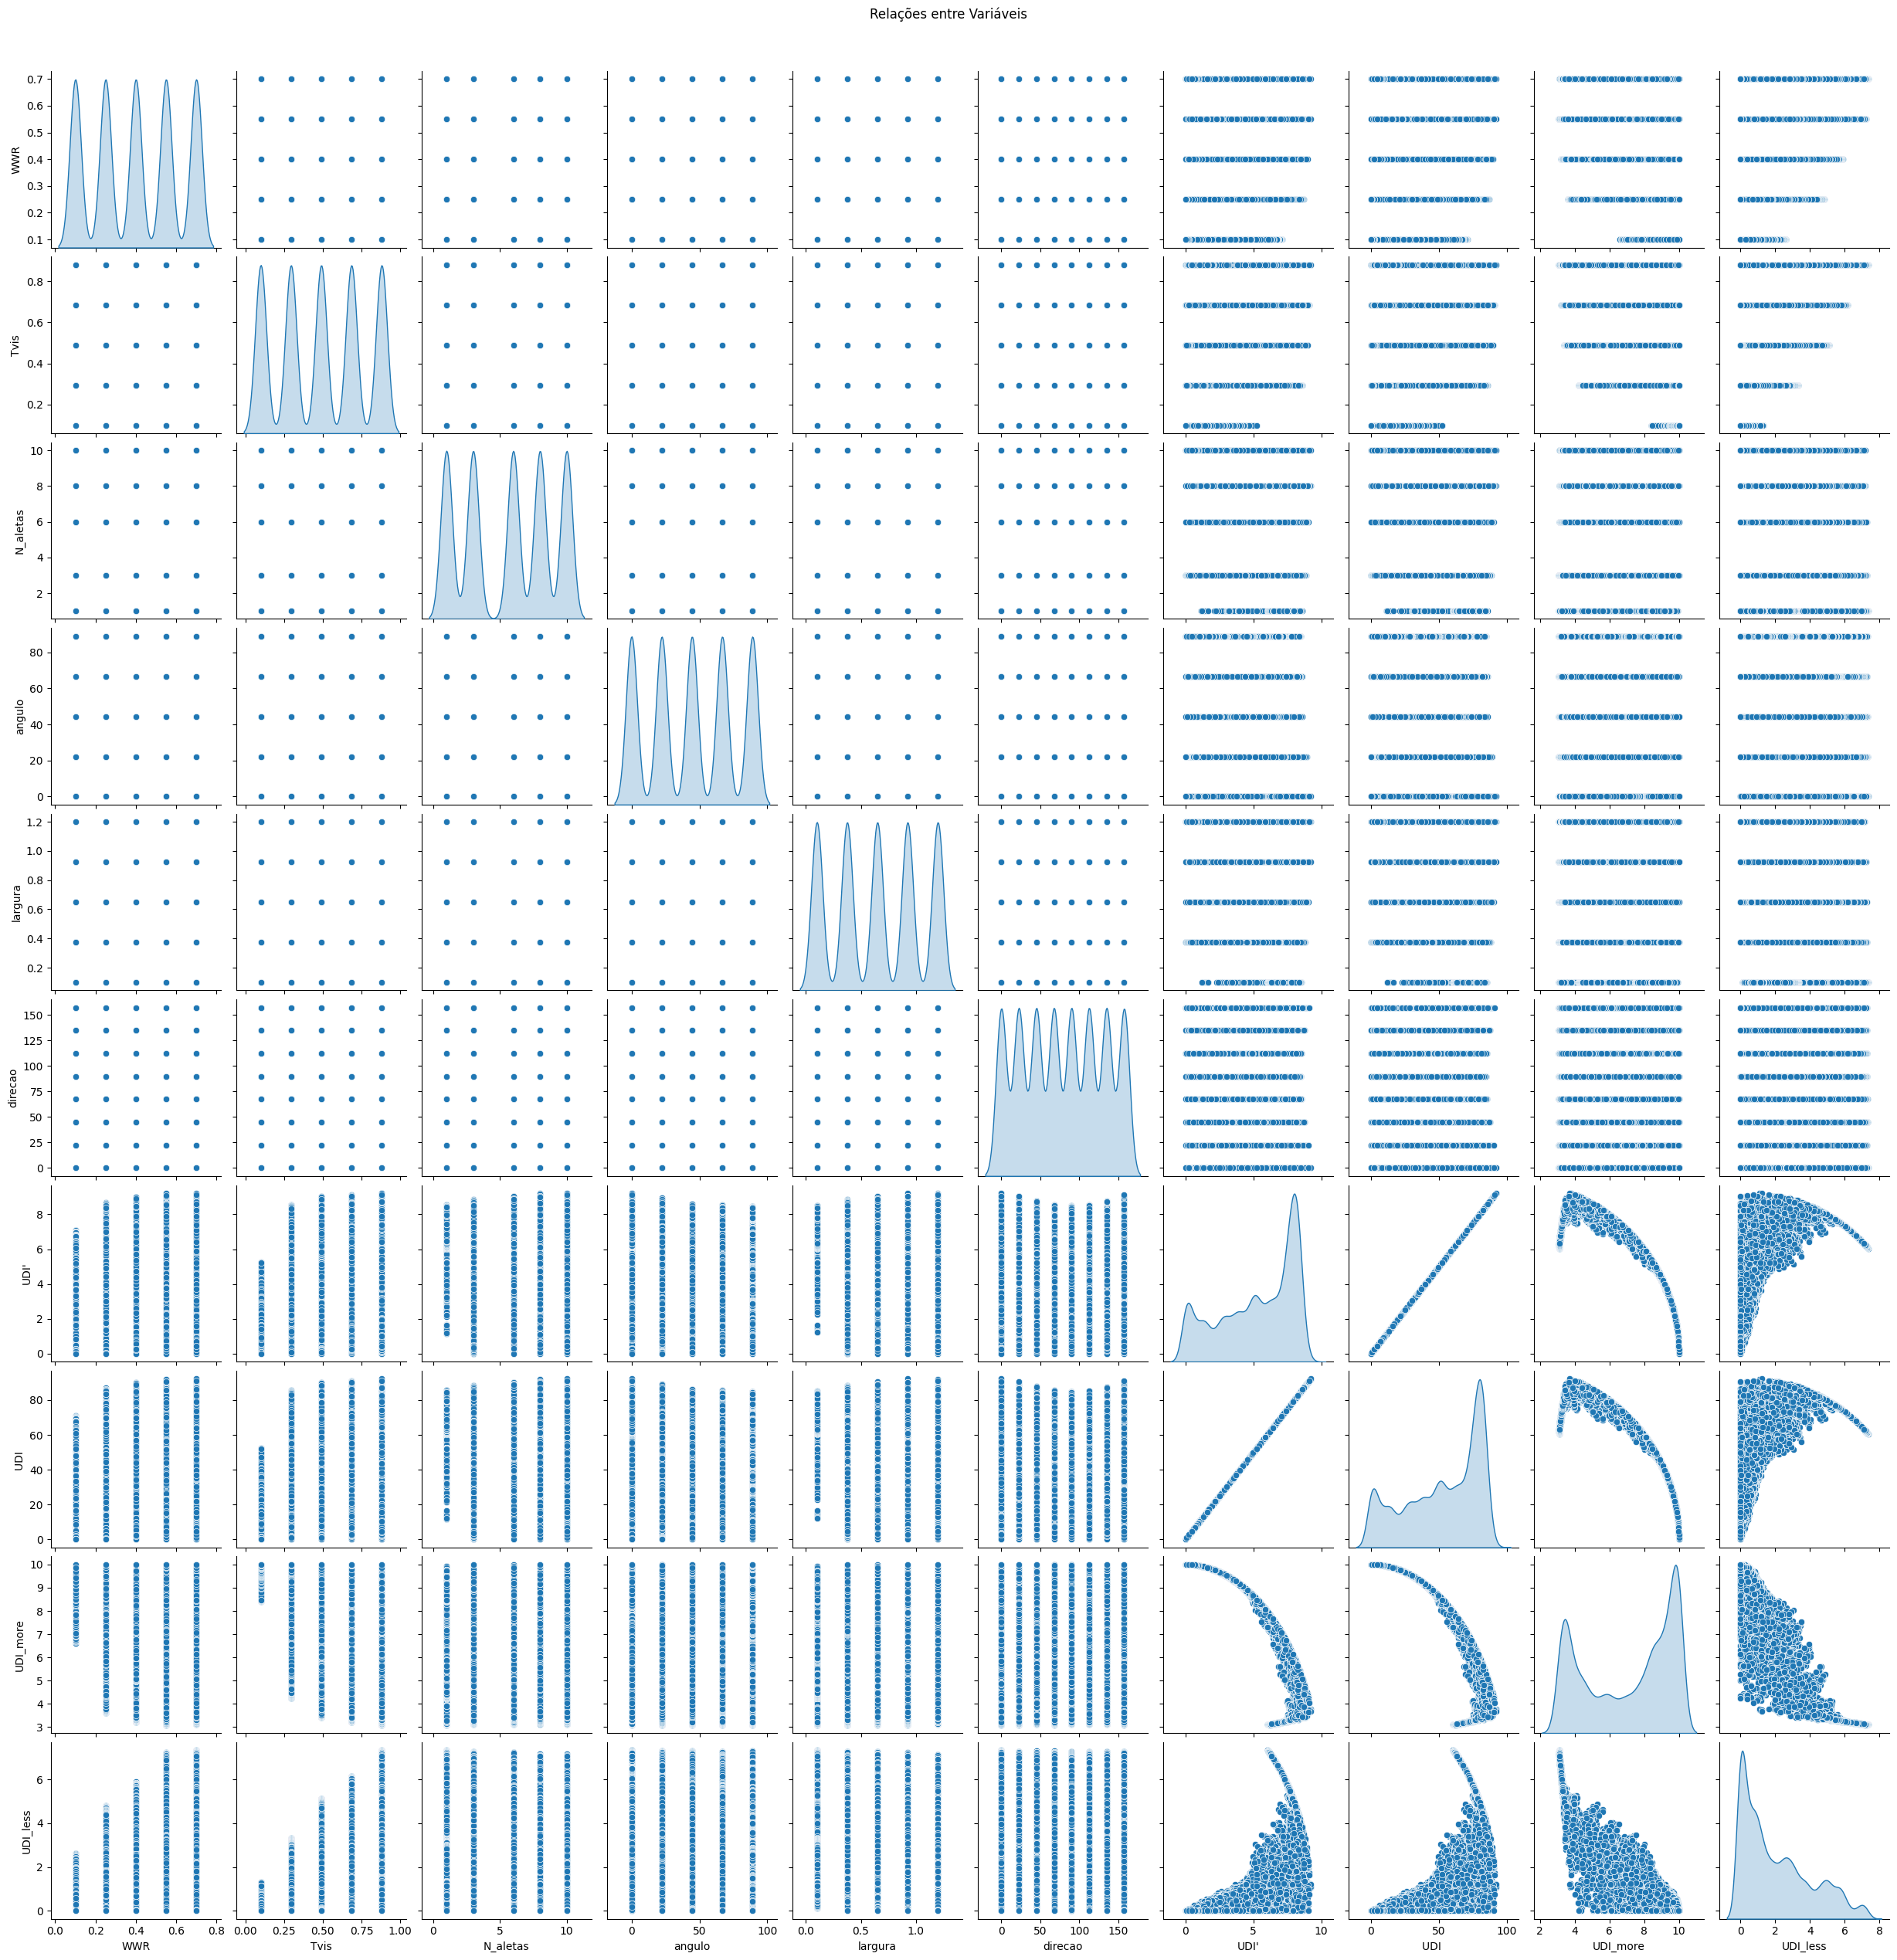

In [23]:
# 4. Pairplot para visualizar relações entre variáveis
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Relações entre Variáveis', y=1.02)
plt.show()

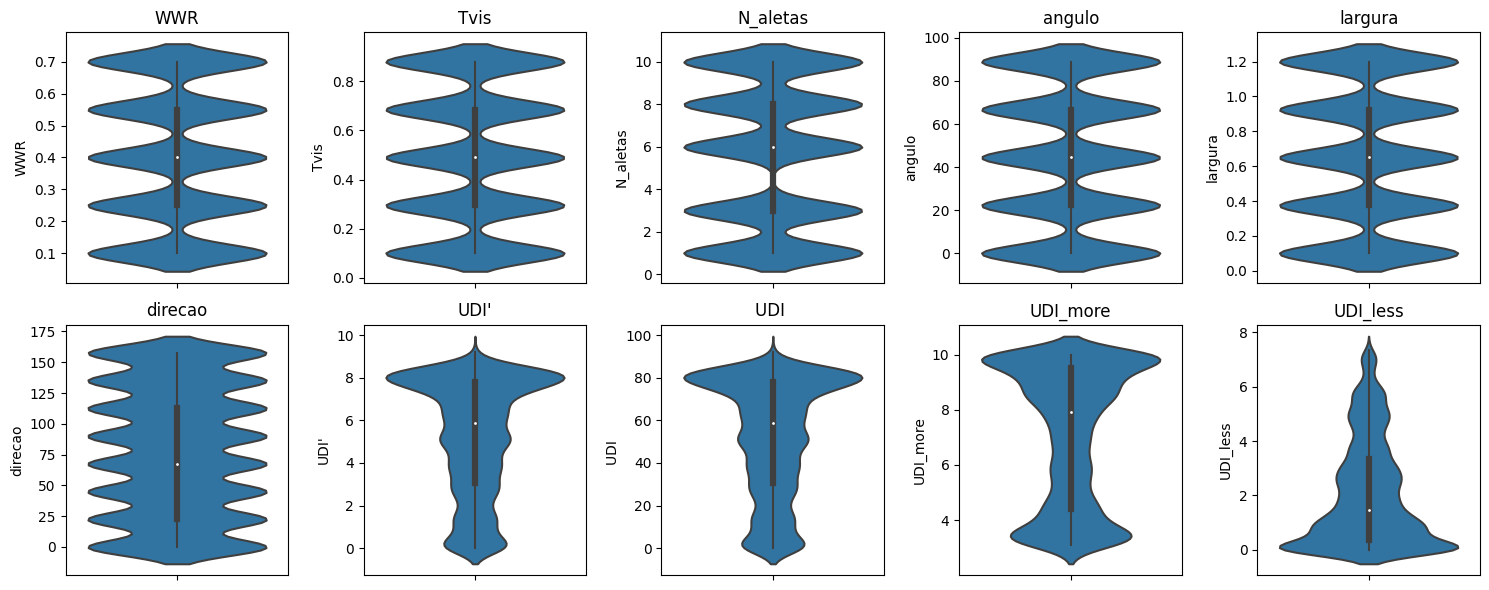

In [24]:
# 5. Violinplots para visualizar a distribuição dos dados
plt.figure(figsize=(15, 6))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(2, 5, i)
    sns.violinplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()